<a href="https://colab.research.google.com/github/DPramparo/supervised-learning/blob/Master/3_Intro_al_aprendizaje_supervisado_(clasificaci%C3%B3n_I)_Damian_Pramparo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Práctico 1
Utilizando de tu elección para clasificación (o regresión), realizar la mejora iterativa de un modelo de predicción para dicho dataset. Realizar un informe (estilo bitácora, puede ser un notebook, un pdf/doc o incluso estar junto con el código) en donde se especifiquen las distintas etapas de iteración del mismo, comentando lo que se intentó, lo que funcionó, lo que no, citando las fuentes consultadas.

Las consignas son las siguientes:

1-Seleccionar un dataset de interés. Puede ser público (ver algunos links de ejemplo debajo) o propio. Cargarlo en un notebook, pre-procesarlo si es necesario y obtener visualizaciones/sumarizaciones del mismo que ayuden a entenderlo. Dadas las técnicas que vimos hasta ahora, se sugiere que el dataset sea estructurado.

2-Sugerencia: empezar con un dataset simple (se adjunta código para comenzar con el dataset breast cancer), priorizando entender las librerías y métodos utilizados por sobre la complejidad de los datos. Una vez hecho eso, pasar a conjuntos de datos más complejos, si así se lo desea. Si se empieza por un dataset simple y se pasa a uno complejo, se sugiere incluir ambos análisis en el informe.

3-Entrenar en el mismo modelos de clasificación (o regresión, si aplica), probando modelos más flexibles como random forest o support vector machines (para repaso: link a notebook con resumen rápido de algunos modelos). Si se usa Kaggle y es una competencia abierta: Se alienta a realizar envíos a Kaggle y especificar cuáles fueron los puntajes en la tabla de posiciones tras la(s) submission(s). Si no se usa Kaggle, especificar la métrica alcanzada en las distintas iteraciones del modelo.

4-Realizar algún tipo de normalización en los datos. Decidir si la misma es incluída (o no) en el modelo, y justificar brevemente por qué (se lo puede ir viendo en la primera parte del notebook de Clasificación II.ipynb)).

5- Buscar buenos híper-parámetros haciendo búsqueda en grilla o algún otro método, utilizando un subconjunto de validación. Puede hacerse manualmente, utilizando k-folds (ver plantilla debajo), mediante la librería de Sklearn, o alguna otra forma.

Si se realiza clasificación, mostrar métricas de tasa de aciertos, precision, recall y matriz de confusión. Si se usara regresión mostrar métricas como el error cuadrático medio.

Fecha de entrega: 28/05/2021 23:59


In [ ]:
#El dataset elegido es el de reconocimiento de genero por voz https://www.kaggle.com/primaryobjects/voicegender
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SFmFhNUWCVI6SodT3JUh74im9UhjPix2' -O "voice.csv"

--2021-05-11 17:12:12--  https://docs.google.com/uc?export=download&id=1SFmFhNUWCVI6SodT3JUh74im9UhjPix2
Resolving docs.google.com (docs.google.com)... 142.250.65.78, 2607:f8b0:4004:837::200e
Connecting to docs.google.com (docs.google.com)|142.250.65.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lct05th17sj6g2ktdbtpvvbnfhoqsb35/1620753075000/13582079848658458518/*/1SFmFhNUWCVI6SodT3JUh74im9UhjPix2?e=download [following]
--2021-05-11 17:12:13--  https://doc-0c-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lct05th17sj6g2ktdbtpvvbnfhoqsb35/1620753075000/13582079848658458518/*/1SFmFhNUWCVI6SodT3JUh74im9UhjPix2?e=download
Resolving doc-0c-94-docs.googleusercontent.com (doc-0c-94-docs.googleusercontent.com)... 172.217.15.65, 2607:f8b0:4004:810::2001
Connecting to doc-0c-94-docs.googleusercontent.com (doc-0c-94-docs.googleus

In [ ]:
#Imports necesarios
import pandas as pd
df_voice = pd.read_csv('voice.csv')
print(df_voice)

      meanfreq        sd    median  ...   dfrange   modindx   label
0     0.059781  0.064241  0.032027  ...  0.000000  0.000000    male
1     0.066009  0.067310  0.040229  ...  0.046875  0.052632    male
2     0.077316  0.083829  0.036718  ...  0.007812  0.046512    male
3     0.151228  0.072111  0.158011  ...  0.554688  0.247119    male
4     0.135120  0.079146  0.124656  ...  5.476562  0.208274    male
...        ...       ...       ...  ...       ...       ...     ...
3163  0.131884  0.084734  0.153707  ...  4.203125  0.161929  female
3164  0.116221  0.089221  0.076758  ...  3.640625  0.277897  female
3165  0.142056  0.095798  0.183731  ...  2.929688  0.194759  female
3166  0.143659  0.090628  0.184976  ...  3.585938  0.311002  female
3167  0.165509  0.092884  0.183044  ...  0.546875  0.350000  female

[3168 rows x 21 columns]


In [ ]:
# Detalle de las columnas
print(df_voice.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [ ]:
#Visualizacion de los datos y conocer que se encuentra en cada una de las columnas
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
#Describe de los datos para conocer mejor como se comportan
df_voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
#Primero, debemos cambiar los string por datos que puedan ser utilizado.
#Procesar label a 0 y 1
#Haciendo uso de OneHotEncoder, podemos convertir los datos a 0 y 1, sin perder la relacion por categoria.
####SACADO DEL GITHUB DE LA CLASE###
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_voice_ohe = encoder.fit(df_voice[['meanfreq', 'label']])
print(df_voice_ohe.categories_)

[array([0.03936334, 0.04825408, 0.05964549, ..., 0.24704068, 0.24963659,
       0.25112376]), array(['female', 'male'], dtype=object)]


In [ ]:
#Revision de los features para ver como quedan.
features_transformados = df_voice_ohe.transform(df_voice[['meanfreq', 'label']]).toarray()

print(df_voice_ohe.get_feature_names(['meanfreq', 'label']))
print(features_transformados)

['meanfreq_0.0393633425835608' 'meanfreq_0.0482540751859225'
 'meanfreq_0.0596454867381567' ... 'meanfreq_0.251123758720282'
 'label_female' 'label_male']
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
#Luego agregamos los datos al dataset original para poder trabajar
import numpy as np

datos_numericos = df_voice[['meanfreq']]
datos_completos = np.hstack((datos_numericos, features_transformados))


####FIN - SACADO DEL GITHUB DE LA CLASE###

In [ ]:
#Revisamos como quedaron los datos
print(datos_completos)
#Los datos no quedan como yo queria, entonces investigando vi que puedo usar LabelEncoder de sklearn

[[0.05978098 0.         0.         ... 0.         0.         1.        ]
 [0.06600874 0.         0.         ... 0.         0.         1.        ]
 [0.0773155  0.         0.         ... 0.         0.         1.        ]
 ...
 [0.14205626 0.         0.         ... 0.         1.         0.        ]
 [0.14365874 0.         0.         ... 0.         1.         0.        ]
 [0.16550895 0.         0.         ... 0.         1.         0.        ]]


In [ ]:
###Empiezo a probar con label encoder para ver como se comporta
#Ya que OneHotEnconder agrandaba demasiado el dataset por la cantidad de datos que hay.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
labels_fit = label_encoder.fit(df_voice['label'])
print(labels_fit)
#label_encoder.transform(df_voice['label'])
print(df_voice['label'])
df_voice['label']=label_encoder.transform(df_voice['label'])
print(df_voice['label'])

LabelEncoder()
0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64


In [ ]:
#Division de los datos en train / test
##70 train 30 test
from sklearn.model_selection import train_test_split

#X = df_voice['meanfreq']
#X = np.hstack((df_voice['meanfreq'], df_voice['label']))
X=df_voice.drop(['label'], axis=1).values
#X = df_voice
y = df_voice['label'].values

# Dividimos el conjunto en train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)

In [ ]:
print(X_train)

[[1.98524035e-01 6.28371230e-02 2.19962049e-01 ... 9.00000000e+00
  8.97656250e+00 1.15839861e-01]
 [1.64784249e-01 1.07549057e-01 2.19729944e-01 ... 7.81250000e-03
  0.00000000e+00 0.00000000e+00]
 [2.08139028e-01 5.79507414e-02 2.32753108e-01 ... 6.09375000e+00
  6.07031250e+00 9.16282136e-02]
 ...
 [1.77195443e-01 6.76690861e-02 1.62105263e-01 ... 3.88671875e+00
  3.88183594e+00 3.01600915e-01]
 [1.94216906e-01 6.57052948e-02 1.91339648e-01 ... 5.01562500e+00
  4.99218750e+00 1.84319249e-01]
 [2.04714748e-01 6.25602366e-02 2.40104575e-01 ... 9.09375000e+00
  9.07031250e+00 5.62466198e-02]]


In [ ]:
print(y_train)

[1 0 1 ... 0 1 1]


In [ ]:
#Primero, voy a intentar con support vector machine, con los datos sin curar.
from sklearn import svm

clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Con support vector machine
y_hat = clf_svm.predict(X_test)
print(y_hat)

[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1
 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 0 0 

In [ ]:
print('Porcentaje de aciertos en la clasificación: ', clf_svm.score(X_test,y_test))

Porcentaje de aciertos en la clasificación:  0.6782334384858044


In [ ]:
##Por curiosidad, quiero probar como se comporta con random forest
##Sacado de sklearn
from sklearn.ensemble import RandomForestClassifier
#Misma semilla que antes en la division (por cabala (?))
clf_random_f = RandomForestClassifier(max_depth=2, random_state=80)
clf_random_f.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=80, verbose=0,
                       warm_start=False)

In [ ]:
y_forest_hat = clf_random_f.predict(X_test)
print(y_forest_hat)

[0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0
 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1
 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1
 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1
 1 0 1 0 0 0 1 1 0 1 0 0 

In [ ]:
print('Porcentaje de aciertos en la clasificación: ', clf_random_f.score(X_test,y_test))

Porcentaje de aciertos en la clasificación:  0.9474237644584648


## Hasta aca los resultados fueron con los datos crudos, sin procesarlos ni nada
### En las proximas lineas voy a procesarlos y trabajar según la guia

In [ ]:
#Analisis de correlacion de los datos
df_voice.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


In [ ]:
#Analisis de sumarizadas
df_voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


[]

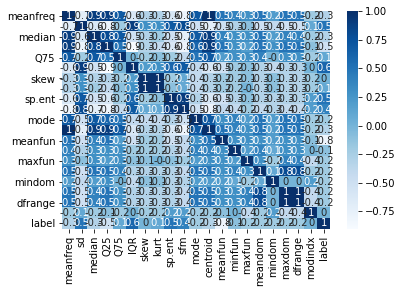

In [ ]:
#Puedo usar el ejemplo de clases para realizar las graficas par el analisis de correlacion
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(round(df_voice.corr(),1), cmap='Blues', annot=True)
plt.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


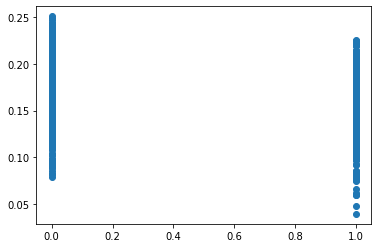

In [ ]:
#Scatter de los datos con frequency mean y genero
df_voice_agrupado = df_voice.groupby('meanfreq')['label','meanfreq'].max()
plt.scatter(df_voice_agrupado['label'] ,df_voice_agrupado['meanfreq'])

In [ ]:
#Procesado de los datos limpiandono
X = df_voice.dropna(subset=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'])
#print(X)
X.describe()
x=df_voice.drop(['label'], axis=1).values
print(x)
#x.describe()

[[0.05978098 0.06424127 0.03202691 ... 0.0078125  0.         0.        ]
 [0.06600874 0.06731003 0.04022873 ... 0.0546875  0.046875   0.05263158]
 [0.0773155  0.08382942 0.03671846 ... 0.015625   0.0078125  0.04651163]
 ...
 [0.14205626 0.09579843 0.18373124 ... 2.9375     2.9296875  0.19475862]
 [0.14365874 0.09062826 0.18497617 ... 3.59375    3.5859375  0.31100218]
 [0.16550895 0.09288354 0.18304392 ... 0.5546875  0.546875   0.35      ]]


In [ ]:
#Division de los datos para poder trabajar
from sklearn.model_selection import train_test_split

y = df_voice['label'].values

In [ ]:
#En esta ocacion, cambio el random state y el tamaño del state, en donde es 60 y 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=60, test_size=0.2)

In [ ]:
print(X_train)

[[0.09791506 0.08550825 0.07815341 ... 0.5234375  0.515625   0.05263158]
 [0.17872069 0.05859404 0.1865124  ... 7.96875    7.9453125  0.13633102]
 [0.14793662 0.05807756 0.13751613 ... 0.80566406 0.70800781 0.83344828]
 ...
 [0.18051728 0.05695537 0.19025042 ... 6.234375   6.2109375  0.126185  ]
 [0.13462555 0.08440291 0.15453076 ... 4.1640625  4.15625    0.10213033]
 [0.20770932 0.04200552 0.20656863 ... 0.546875   0.5390625  0.15642179]]


In [ ]:
print(X_test)

[[0.14585924 0.06670802 0.12540135 ... 0.74707031 0.67382812 0.38969404]
 [0.20321819 0.05075136 0.21677419 ... 9.140625   9.1171875  0.1318065 ]
 [0.21379548 0.05923263 0.23509002 ... 4.96875    4.9453125  0.08796671]
 ...
 [0.18526983 0.05897891 0.16821918 ... 6.375      6.3515625  0.13591636]
 [0.15972284 0.0580449  0.13540984 ... 3.34960938 3.25683594 0.31100075]
 [0.17489232 0.05503225 0.18388715 ... 7.03125    7.0078125  0.0874846 ]]


In [ ]:
print(y_train)

[1 1 1 ... 1 0 0]


In [ ]:
print(y_train)

[1 1 1 ... 1 0 0]


In [ ]:
##Al igual que antes voy a usar los dos clasificadores, SVM y Random Forest
#En esta caja cargo el Random Forest
from sklearn.ensemble import RandomForestClassifier
clf2_random_f = RandomForestClassifier(max_depth=2, random_state=0)
clf2_random_f.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_forest_hat_2 = clf2_random_f.predict(X_test)
print(y_forest_hat_2)

[1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0
 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0
 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1
 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1
 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0
 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1
 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 1 0 1 1 1 0 1 1 1 1 

In [ ]:
#Mido el rendimiento que tiene este clasificador
print('Porcentaje de aciertos en la clasificación con los datos limpios: ', clf2_random_f.score(X_test,y_test))

Porcentaje de aciertos en la clasificación con los datos limpios:  0.9369085173501577


In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_forest_hat_2))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       332
           1       0.91      0.96      0.94       302

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



In [ ]:
###Ahora a probar con SVM
from sklearn import svm

clf2_svm = svm.SVC()
clf2_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_hat_svm2 = clf2_svm.predict(X_test)
print(y_hat_svm2)

[1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 1 1 

In [ ]:
#Midiendo perfomance de SVM y comparo frente Random forest
print('Porcentaje de aciertos en la clasificación con los datos limpios SVM: ',  clf2_svm.score(X_test,y_test))

Porcentaje de aciertos en la clasificación con los datos limpios SVM:  0.6545741324921136


In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_hat_svm2))

              precision    recall  f1-score   support

           0       0.75      0.52      0.61       332
           1       0.60      0.81      0.69       302

    accuracy                           0.65       634
   macro avg       0.67      0.66      0.65       634
weighted avg       0.68      0.65      0.65       634



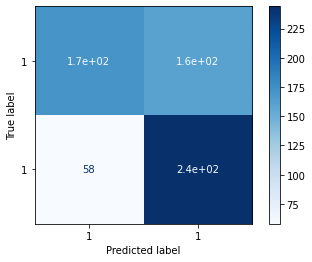

In [ ]:
#Matriz de confusion para Support Vector Machine
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf2_svm, X_test, y_test,
                      display_labels=df_voice['label'],
                      cmap=plt.cm.Blues)
plt.show()

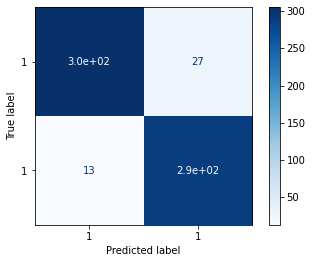

In [ ]:
#Matriz de confusion para Random Forest
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf2_random_f, X_test, y_test,
                      display_labels=df_voice['label'],
                      cmap=plt.cm.Blues)
plt.show()

###Habiendo probado la matriz de confusion en ambos modelos, puedo decir que random forest es el que menor cantidad de falsas clasificaciones tiene, con los datos sin normalizar.

### Hasta ahora los dos clasificadores funcionan bien, pero como era de esperar Random Forest es el que mas score tuvo

Procedere a normalizar los datos para probar el funcionamiento de los dos clasificadores.

In [ ]:
from sklearn.preprocessing import StandardScaler

La normalización la llevaré a cabo con Standar Scaler ya que es la mejor opción según lo analizado en la clase.
La normalizacion no es llevada acabo dentro del modelo, sino antes y utilizada para todos los que tenemos.

In [ ]:
scaler= preprocessing.StandardScaler().fit(X_train)

scaler.mean_

array([ 0.18044156,  0.05727269,  0.18538621,  0.1396256 ,  0.22440265,
        0.08477705,  3.13782085, 36.6401589 ,  0.89561185,  0.41137455,
        0.16453725,  0.18044156,  0.14231613,  0.03673278,  0.2584852 ,
        0.8274692 ,  0.05212254,  5.03259904,  4.9804765 ,  0.17346806])

In [ ]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
###Ahora a probar con SVM
from sklearn import svm

clf2_svm_norm = svm.SVC()
clf2_svm_norm.fit(X_train_norm, y_train)

y_hat_svm_norm = clf2_svm_norm.predict(X_test_norm)

In [ ]:
#Normalizando los datos, SVM aumento muchisimo su perfomance.
print("Porcentaje de aciertos luego de normalizar los datos: ", clf2_svm_norm.score(X_test_norm,y_test))

Porcentaje de aciertos luego de normalizar los datos:  0.9779179810725552


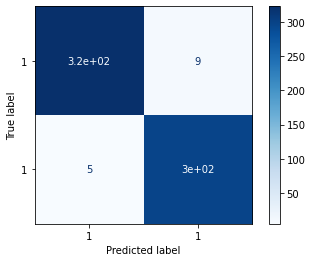

In [ ]:
#Matriz de confusion para SVM
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf2_svm_norm, X_test_norm, y_test,
                      display_labels=df_voice['label'],
                      cmap=plt.cm.Blues)
plt.show()

Hasta aca, sin haber probado random forest, puedo observar que se obtiene un score mucho mayor en support vector machine, con los datos ya normalizados, ahora es momento de probar Random Forest con los datos normalizados y ver como se comporta

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2_random_f_norm = RandomForestClassifier(max_depth=2, random_state=75)
clf2_random_f_norm.fit(X_train_norm, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=75, verbose=0,
                       warm_start=False)

In [ ]:
y_forest_hat_norm = clf2_random_f_norm.predict(X_test_norm)
#Normalizando los datos, random forest perdio un poco de performance.
print("Porcentaje de aciertos luego de normalizar los datos: ", clf2_random_f_norm.score(X_test_norm,y_test))

Porcentaje de aciertos luego de normalizar los datos:  0.9574132492113565


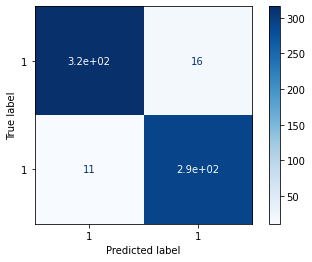

In [ ]:
#Matriz de confusion para Random Forest
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf2_random_f_norm, X_test_norm, y_test,
                      display_labels=df_voice['label'],
                      cmap=plt.cm.Blues)
plt.show()

Como conclusión hasta esta parte, se puede ver con claridad que random forest es un metodo muy potente para poder trabajar con datasets sin normalizar, pero a la hora de normalizar, support vector machine se vuelve muy certero, tanto como al nivel de random forest sin normalizar. Aun asi, se obtuvo mayor score con random sin normalizar los datos.

Ahora, voy a trabajar en la optimizacion de hiperparametros y luego en KFolds

In [ ]:
#Procedo con la optimizacion de hiperparametros con la utilizacion de busqueda en grilla
from sklearn.model_selection import GridSearchCV

In [ ]:
#Basandome en la documentacion oficial de sklearn
#parameters = {'kernel':('linear','rbf'), 'C':[1, 10,50,100]}
parameters = [{
'kernel': ['linear', 'poly', 'rbf'], 
'C': [0.0001,0.001,0.01,0.01,1,2,3,100],
 'gamma':[100,1000,10000]
}]
clf_svm_grid = GridSearchCV(
    
        svm.SVC(probability=True), parameters, scoring='accuracy'
    )


clf_svm_grid.fit(X_train_norm, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.01, 1, 2, 3, 100],
                          'gamma': [100, 1000, 10000],
                          'kernel': ['linear', 'poly', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(clf_svm_grid.best_params_)

{'C': 100, 'gamma': 100, 'kernel': 'linear'}


In [ ]:
print(clf_svm_grid)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.01, 1, 2, 3, 100],
                          'gamma': [100, 1000, 10000],
                          'kernel': ['linear', 'poly', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)


In [ ]:
y_hat_svm_grid = clf_svm_grid.predict(X_test_norm)

In [ ]:
#En optimizacon de hiperparametros, no hubo camios en SVM.
print("Porcentaje de aciertos luego de optimizar hiperparametros: ", clf_svm_grid.score(X_test_norm,y_test))

Porcentaje de aciertos luego de optimizar hiperparametros:  0.9716088328075709


In [ ]:
#Para probar con random forest
#Me resulta interesante porque mas arriba vi que cambiando el random state, el resultado es diferente

parameters = { "n_estimators"      : [1,50,100,200],
              # "random_state": [1,2,50,60,70,80,90],
              #No vale la pena cambiar los random satate porque con o sin, me da el mismo score y no vale la pena computacionalmente
               "max_features"      : ['auto'],
               "max_depth"         : [3,4,6,10],
               "min_samples_split"  : [3]
         }
clf_rf_grid = GridSearchCV(
        RandomForestClassifier(), parameters, scoring='accuracy'
    )



clf_rf_grid.fit(X_train_norm, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
clf_rf_grid.score(X_train_norm,y_train)

0.999605367008682

Procedo con la validacion de K-Folds - Random Forest

In [ ]:
##############PLANTILLA SACADA DEL NOTEBOOK DE LA CLASE EN GITHUB
####https://github.com/inteligenciafrvm/inteligenciafrvm/blob/master/Clases%20pr%C3%A1cticas/3.%20Intro%20al%20aprendizaje%20supervisado%20(clasificaci%C3%B3n%20I).ipynb
# Plantilla inicial de ejemplo para KFolds

from sklearn.model_selection import KFold


count = 0
# n_splits es el numero de divisiones
n_splits = 5 #Uso 5 porque es el minimo recomendado, tambien podria usar 10, pero con 5 es suficiente
acum_rf = 0
kf = KFold(n_splits=n_splits, shuffle=True,random_state=40)

# El siguiente for nos abstrae de tener que manejar explicitamente los subindices de los folds, 
# al dividir el conjunto de entrenamiento iterativamente. En cada una de sus iteraciones
# obtenemos los subindices de todos los folds de entrenamiento y del fold de validacion de una
# division en particular, de modo tal que todos los k folds sean al menos una vez usados para 
# entrenar el modelo
for train_index, validation_index in kf.split(X_train):
    X_train_kf, X_validation_kf = X_train_norm[train_index], X_train_norm[validation_index]
    y_train_kf, y_validation_kf = y_train[train_index], y_train[validation_index]
    
    count +=1
    #y_forest_hat_norm = clf2_random_f_norm.predict(X_validation_kf)

    print('Porcentaje de acierto para Fold', count, ':', clf_rf_grid.score(X_validation_kf,y_validation_kf))
    
    acum_rf +=clf_svm_grid.score(X_validation_kf,y_validation_kf)

print("El promedio de los scores que obtuve fue ", acum_rf/n_splits)
    # desde aqui estamos trabajando con una division train-validation en particular
    # es decir, por ejemplo, que train_index nos da todos los indices que componen a
    # los folds que se usaran para entrenar el modelo en esta division. Usamos estos
    # indices para obtener los X_train_kf y los y_train_kf. Lo mismo sucede con los
    # indices usados para el fold de validación en esta division. Si se desea ver
    # como cambian los indices en cada iteracion, hacer un print(validation_index)

Porcentaje de acierto para Fold 1 : 1.0
Porcentaje de acierto para Fold 2 : 1.0
Porcentaje de acierto para Fold 3 : 1.0
Porcentaje de acierto para Fold 4 : 1.0
Porcentaje de acierto para Fold 5 : 0.9980237154150198
El promedio de los scores que obtuve fue  0.9759251896375641


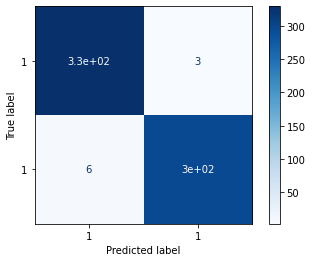

In [ ]:
#Matriz de confusion para SVM con las optimizaciones realizadas.
plot_confusion_matrix(clf_rf_grid, X_test_norm, y_test,
                      display_labels=df_voice['label'],
                      cmap=plt.cm.Blues)
plt.show()

In [ ]:
!pip install scikit-plot

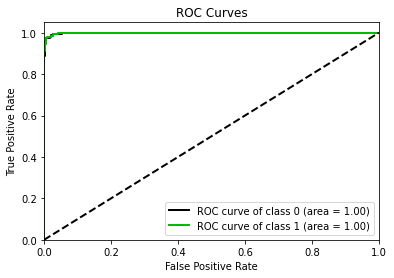

In [ ]:
import scikitplot as skplt

y_hat_probas = clf_rf_grid.predict_proba(X_test_norm)

# predicted probabilities generated by sklearn classifier
# Notar que micro-average ROC curve es el promedio de las áreas de las curvas ROC, 
# mientras que macro-average ROC curve es el mismo promedio pero ponderado por la 
# cantidad de observaciones de cada clase.
skplt.metrics.plot_roc(y_test, y_hat_probas, plot_micro=False, plot_macro=False)
plt.show()

Procedo con la validacion de K-Folds - SVM


In [ ]:
##############PLANTILLA SACADA DEL NOTEBOOK DE LA CLASE EN GITHUB
####https://github.com/inteligenciafrvm/inteligenciafrvm/blob/master/Clases%20pr%C3%A1cticas/3.%20Intro%20al%20aprendizaje%20supervisado%20(clasificaci%C3%B3n%20I).ipynb
# Plantilla inicial de ejemplo para KFolds

from sklearn.model_selection import KFold


count = 0
# n_splits es el numero de divisiones
n_splits = 5 #Uso 5 porque es el minimo recomendado, tambien podria usar 10, pero con 5 es suficiente
acum = 0
kf = KFold(n_splits=n_splits, shuffle=True,random_state=40)

# El siguiente for nos abstrae de tener que manejar explicitamente los subindices de los folds, 
# al dividir el conjunto de entrenamiento iterativamente. En cada una de sus iteraciones
# obtenemos los subindices de todos los folds de entrenamiento y del fold de validacion de una
# division en particular, de modo tal que todos los k folds sean al menos una vez usados para 
# entrenar el modelo
for train_index, validation_index in kf.split(X_train):
    X_train_kf, X_validation_kf = X_train_norm[train_index], X_train_norm[validation_index]
    y_train_kf, y_validation_kf = y_train[train_index], y_train[validation_index]
    
    count +=1
    #y_forest_hat_norm = clf2_random_f_norm.predict(X_validation_kf)

    print('Porcentaje de acierto para Fold', count, ':', clf_svm_grid.score(X_validation_kf,y_validation_kf))
    
    acum +=clf_svm_grid.score(X_validation_kf,y_validation_kf)

print("El promedio de los scores que obtuve fue ", acum/n_splits)
    # desde aqui estamos trabajando con una division train-validation en particular
    # es decir, por ejemplo, que train_index nos da todos los indices que componen a
    # los folds que se usaran para entrenar el modelo en esta division. Usamos estos
    # indices para obtener los X_train_kf y los y_train_kf. Lo mismo sucede con los
    # indices usados para el fold de validación en esta division. Si se desea ver
    # como cambian los indices en cada iteracion, hacer un print(validation_index)

Porcentaje de acierto para Fold 1 : 0.9723865877712031
Porcentaje de acierto para Fold 2 : 0.9921104536489151
Porcentaje de acierto para Fold 3 : 0.980276134122288
Porcentaje de acierto para Fold 4 : 0.9644970414201184
Porcentaje de acierto para Fold 5 : 0.9703557312252964
El promedio de los scores que obtuve fue  0.9759251896375641


Hasta los resultados que se obtuvieron anteriormente, tengo diferentes pasos antes que se van acumulando para mejorar la perfomance, en donde, primero normalice los datos (SantandarScaler) y probe, luego realicé la optimizacion de hiperparametros con busqueda en grilla y hasta llegar a k fold con 5 folds diferentes para poder validar y se logro una perfomance en promedio de 98,5% en Support Vector Machine.
Se nota bastante la diferencia a la hora realizar algun tipo de procesado al dataset en el caso de SVM

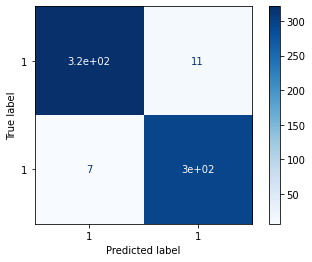

In [ ]:
#Matriz de confusion para SVM con las optimizaciones realizadas.
plot_confusion_matrix(clf_svm_grid, X_test_norm, y_test,
                      display_labels=df_voice['label'],
                      cmap=plt.cm.Blues)
plt.show()

Realización de curva ROC para poder tener mayor infomación si el clasificador funciona correctamente

In [ ]:
!pip install scikit-plot

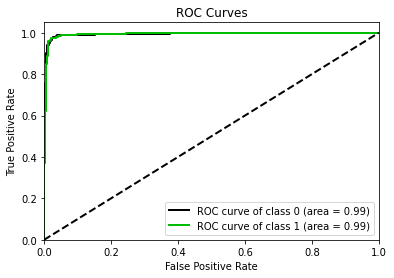

In [ ]:
import scikitplot as skplt

y_hat_probas = clf_svm_grid.predict_proba(X_test_norm)

# predicted probabilities generated by sklearn classifier
# Notar que micro-average ROC curve es el promedio de las áreas de las curvas ROC, 
# mientras que macro-average ROC curve es el mismo promedio pero ponderado por la 
# cantidad de observaciones de cada clase.
skplt.metrics.plot_roc(y_test, y_hat_probas, plot_micro=False, plot_macro=False)
plt.show()

Realice la curva roc para tener mucha mas informacion acerca de lo que realizaba el clasificador, porque pense que estaba overfiteando los datos. Pero al ver esta curva, me quedo claro que no. ya que llega a la linea verde pero no de manera inmediata, sino de manera escalonada.

# Realizare una implementacion completa con otro dataset para afianzar conocimientos


In [ ]:
#El dataset elegido es el de Desorden del especto autista https://www.kaggle.com/faizunnabi/autism-screening
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15AfzxVn8IWiBOK_-ZkYu_Y56zSOka58-' -O "autism.csv"

--2021-05-28 13:20:42--  https://docs.google.com/uc?export=download&id=15AfzxVn8IWiBOK_-ZkYu_Y56zSOka58-
Resolving docs.google.com (docs.google.com)... 142.250.157.138, 142.250.157.101, 142.250.157.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.157.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l4vukotmv6sjljup09b6j20cn66kv4ct/1622208000000/13582079848658458518/*/15AfzxVn8IWiBOK_-ZkYu_Y56zSOka58-?e=download [following]
--2021-05-28 13:20:43--  https://doc-0c-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l4vukotmv6sjljup09b6j20cn66kv4ct/1622208000000/13582079848658458518/*/15AfzxVn8IWiBOK_-ZkYu_Y56zSOka58-?e=download
Resolving doc-0c-94-docs.googleusercontent.com (doc-0c-94-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0c-94-docs.googleusercontent.com (doc-0c-

In [ ]:
df_autism = pd.read_csv('autism.csv')

In [ ]:
print(df_autism)

      Case_No  A1  ...  Who completed the test  Class/ASD Traits 
0           1   0  ...           family member                 No
1           2   1  ...           family member                Yes
2           3   1  ...           family member                Yes
3           4   1  ...           family member                Yes
4           5   1  ...           family member                Yes
...       ...  ..  ...                     ...                ...
1049     1050   0  ...           family member                 No
1050     1051   0  ...           family member                Yes
1051     1052   1  ...           family member                Yes
1052     1053   1  ...           family member                 No
1053     1054   1  ...           family member                Yes

[1054 rows x 19 columns]


In [ ]:
df_autism.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
df_autism.dropna()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
labels_fit = label_encoder.fit(df_autism['Class/ASD Traits '])
print(labels_fit)
#label_encoder.transform(df_voice['label'])
print(df_autism['Class/ASD Traits '])
df_autism['Class/ASD Traits ']=label_encoder.transform(df_autism['Class/ASD Traits '])
print(df_autism['Class/ASD Traits '])

LabelEncoder()
0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1049     No
1050    Yes
1051    Yes
1052     No
1053    Yes
Name: Class/ASD Traits , Length: 1054, dtype: object
0       0
1       1
2       1
3       1
4       1
       ..
1049    0
1050    1
1051    1
1052    0
1053    1
Name: Class/ASD Traits , Length: 1054, dtype: int64


In [ ]:
label_encoder = preprocessing.LabelEncoder()
labels_fit = label_encoder.fit(df_autism['Family_mem_with_ASD'])
print(labels_fit)
#label_encoder.transform(df_voice['label'])
print(df_autism['Family_mem_with_ASD'])
df_autism['Family_mem_with_ASD']=label_encoder.transform(df_autism['Family_mem_with_ASD'])
print(df_autism['Family_mem_with_ASD'])

LabelEncoder()
0        no
1        no
2        no
3        no
4       yes
       ... 
1049    yes
1050     no
1051     no
1052    yes
1053    yes
Name: Family_mem_with_ASD, Length: 1054, dtype: object
0       0
1       0
2       0
3       0
4       1
       ..
1049    1
1050    0
1051    0
1052    1
1053    1
Name: Family_mem_with_ASD, Length: 1054, dtype: int64


In [ ]:
label_encoder = preprocessing.LabelEncoder()
labels_fit = label_encoder.fit(df_autism['Jaundice'])
print(labels_fit)
#label_encoder.transform(df_voice['label'])
print(df_autism['Jaundice'])
df_autism['Jaundice']=label_encoder.transform(df_autism['Jaundice'])
print(df_autism['Jaundice'])

LabelEncoder()
0       yes
1       yes
2       yes
3        no
4        no
       ... 
1049     no
1050    yes
1051    yes
1052     no
1053    yes
Name: Jaundice, Length: 1054, dtype: object
0       1
1       1
2       1
3       0
4       0
       ..
1049    0
1050    1
1051    1
1052    0
1053    1
Name: Jaundice, Length: 1054, dtype: int64


In [ ]:
label_encoder = preprocessing.LabelEncoder()
labels_fit = label_encoder.fit(df_autism['Sex'])
print(labels_fit)
#label_encoder.transform(df_voice['label'])
print(df_autism['Sex'])
df_autism['Sex']=label_encoder.transform(df_autism['Sex'])
print(df_autism['Sex'])

LabelEncoder()
0       f
1       m
2       m
3       m
4       f
       ..
1049    f
1050    m
1051    m
1052    m
1053    m
Name: Sex, Length: 1054, dtype: object
0       0
1       1
2       1
3       1
4       0
       ..
1049    0
1050    1
1051    1
1052    1
1053    1
Name: Sex, Length: 1054, dtype: int64


In [ ]:
df_autism.corr()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
Case_No,1.000000,0.050828,-0.002668,0.082087,0.073426,0.055263,0.041315,0.087687,0.023916,0.069870,-0.027257,0.027098,0.077110,0.066949,-0.002757,-0.013243,0.079966
A1,0.050828,1.000000,0.463227,0.244362,0.247524,0.284808,0.373083,0.332705,0.208197,0.322226,0.130966,0.040508,0.614064,0.111508,-0.005613,0.053020,0.503810
A2,-0.002668,0.463227,1.000000,0.206927,0.265867,0.259105,0.309461,0.294314,0.251865,0.268784,0.157498,0.037744,0.592424,0.067086,0.046039,0.034800,0.463467
A3,0.082087,0.244362,0.206927,1.000000,0.547100,0.349086,0.297719,0.211375,0.243758,0.379129,0.003848,-0.109880,0.592885,0.063299,-0.006874,0.040913,0.409701
A4,0.073426,0.247524,0.265867,0.547100,1.000000,0.348459,0.347693,0.318546,0.251504,0.427683,0.016872,-0.087873,0.642890,0.105087,0.027464,-0.036625,0.505204
A5,0.055263,0.284808,0.259105,0.349086,0.348459,1.000000,0.415309,0.348913,0.316661,0.441892,0.045347,0.018448,0.649518,0.129724,0.025135,-0.021662,0.563297
A6,0.041315,0.373083,0.309461,0.297719,0.347693,0.415309,1.000000,0.361758,0.280556,0.416213,0.072162,0.065907,0.659377,0.025144,-0.004882,0.046654,0.569424
A7,0.087687,0.332705,0.294314,0.211375,0.318546,0.348913,0.361758,1.000000,0.257228,0.360686,0.175114,0.021442,0.619053,0.044680,0.048327,-0.024248,0.563177
A8,0.023916,0.208197,0.251865,0.243758,0.251504,0.316661,0.280556,0.257228,1.000000,0.293457,0.082004,0.080505,0.543229,0.076609,0.003202,-0.036569,0.427155
A9,0.069870,0.322226,0.268784,0.379129,0.427683,0.441892,0.416213,0.360686,0.293457,1.000000,0.028710,-0.048650,0.671638,0.087463,0.012801,-0.011486,0.577336


[]

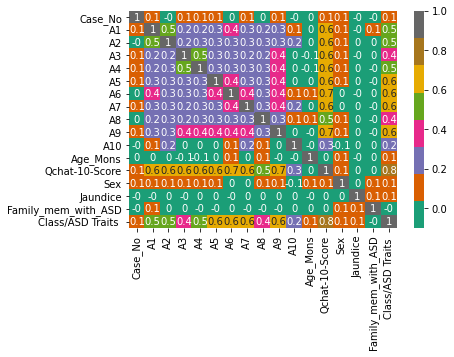

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(round(df_autism.corr(),1), cmap='Dark2', annot=True)
plt.plot()

In [ ]:
df_autism.drop(['Ethnicity','Who completed the test'],axis=1)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,1,0,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,1,0,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,1,0,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,0,0,1,0
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,1,1,0,1
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,1,1,0,1
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,1,0,1,0


In [ ]:
X=df_autism.drop(['Class/ASD Traits ','Who completed the test', 'Ethnicity'], axis=1).values
#X = df_voice
y = df_autism['Class/ASD Traits '].values

# Dividimos el conjunto en train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)

In [ ]:
print(X)

[[   1    0    0 ...    0    1    0]
 [   2    1    1 ...    1    1    0]
 [   3    1    0 ...    1    1    0]
 ...
 [1052    1    0 ...    1    1    0]
 [1053    1    0 ...    1    0    1]
 [1054    1    1 ...    1    1    1]]


In [ ]:
scaler_autism= preprocessing.StandardScaler().fit(X_train)

scaler_autism.mean_



array([5.25591588e+02, 5.61736771e-01, 4.36906377e-01, 4.11126187e-01,
       5.29172320e-01, 5.34599729e-01, 5.82089552e-01, 6.60786974e-01,
       4.46404342e-01, 5.00678426e-01, 6.01085482e-01, 2.78480326e+01,
       5.26458616e+00, 6.94708277e-01, 2.67299864e-01, 1.64179104e-01])

In [ ]:
X_train_norm = scaler_autism.transform(X_train)
X_test_norm = scaler_autism.transform(X_test)

In [ ]:
from sklearn import svm

clf_svm_autism = svm.SVC()
clf_svm_autism.fit(X_train_norm, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
 print('Suport Vector Classfier en autismo:', clf_svm_autism.score(X_test_norm,y_test))

Suport Vector Classfier en autismo: 0.9905362776025236


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{
'kernel': ['linear', 'poly', 'rbf'], 
'C': [0.0001,0.001,0.01,0.01,1,2,3,100],
 'gamma':[100,1000,10000]
}]
clf_svm_grid_autism = GridSearchCV(
    
        svm.SVC(probability=True), parameters, scoring='accuracy'
    )


clf_svm_grid_autism.fit(X_train_norm, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.01, 1, 2, 3, 100],
                          'gamma': [100, 1000, 10000],
                          'kernel': ['linear', 'poly', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
from sklearn.model_selection import KFold


count = 0

n_splits = 5
acum = 0
kf = KFold(n_splits=n_splits, shuffle=True,random_state=40)

for train_index, validation_index in kf.split(X_train):
    X_train_kf, X_validation_kf = X_train_norm[train_index], X_train_norm[validation_index]
    y_train_kf, y_validation_kf = y_train[train_index], y_train[validation_index]
    
    count +=1

    print('Porcentaje de acierto para Fold', count, ':', clf_svm_grid_autism.score(X_validation_kf,y_validation_kf))
    
    acum +=clf_svm_grid_autism.score(X_validation_kf,y_validation_kf)

print("El promedio de los scores que obtuve fue ", acum/n_splits)

Porcentaje de acierto para Fold 1 : 1.0
Porcentaje de acierto para Fold 2 : 1.0
Porcentaje de acierto para Fold 3 : 1.0
Porcentaje de acierto para Fold 4 : 1.0
Porcentaje de acierto para Fold 5 : 1.0
El promedio de los scores que obtuve fue  1.0


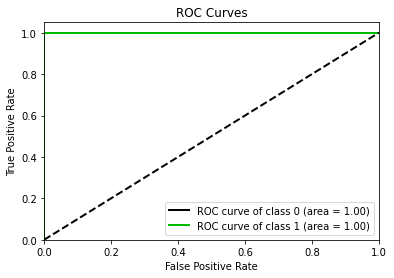

In [ ]:
y_hat_probas = clf_svm_grid_autism.predict_proba(X_test_norm)

# predicted probabilities generated by sklearn classifier
# Notar que micro-average ROC curve es el promedio de las áreas de las curvas ROC, 
# mientras que macro-average ROC curve es el mismo promedio pero ponderado por la 
# cantidad de observaciones de cada clase.
skplt.metrics.plot_roc(y_test, y_hat_probas, plot_micro=False, plot_macro=False)
plt.show()

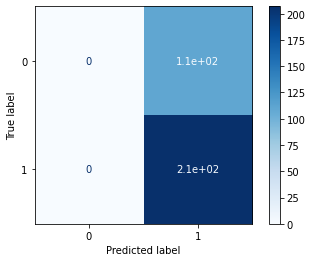

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_svm_grid_autism, X_test, y_test,
                      display_labels=df_autism['Class/ASD Traits '],
                      cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn import metrics
y_svm_hat_autism = clf_svm_grid_autism.predict(X_test_norm)
print(metrics.classification_report(y_test, y_svm_hat_autism))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       207

    accuracy                           1.00       317
   macro avg       1.00      1.00      1.00       317
weighted avg       1.00      1.00      1.00       317

